In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [5]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [6]:
df.info

<bound method DataFrame.info of      Ticket #                                 Customer Complaint      Date  \
0      250635                      Comcast Cable Internet Speeds  22-04-15   
1      223441       Payment disappear - service got disconnected  04-08-15   
2      242732                                  Speed and Service  18-04-15   
3      277946  Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   
4      307175         Comcast not working and no service to boot  26-05-15   
...       ...                                                ...       ...   
2219   213550                               Service Availability  04-02-15   
2220   318775         Comcast Monthly Billing for Returned Modem  06-02-15   
2221   331188                            complaint about comcast  06-09-15   
2222   360489             Extremely unsatisfied Comcast customer  23-06-15   
2223   363614               Comcast, Ypsilanti MI Internet Speed  24-06-15   

     Date_month_year         Ti

In [7]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [8]:
df.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


Dropping any Duplicates

In [9]:
df.drop_duplicates(inplace=True)


Renaming column with lowercase and replacing empty with _

In [10]:
df.columns = list(map(lambda x: x.replace(' ','_').lower() , df.columns))


df

Renaming ticket_# with proper column name as 'ticketNo'

In [11]:
df.rename(columns = {'ticket_#' : 'ticketNo'},inplace=True)

Replacing invalid entry in ticketNo column


In [12]:

df.drop(index = df[df.ticketNo == 'comcas'].index,inplace=True)


 Converting column data types

In [13]:
df.ticketNo= df.ticketNo.astype(int)
df.zip_code= df.zip_code.astype(int)
df.customer_complaint=df.customer_complaint.astype(str)

 Converting date column to dateTime format

In [14]:
df["full_date"] = df["date_month_year"] + " " + df["time"]
df["date_month_year"] = pd.to_datetime(df["date_month_year"])
df["full_date"] = pd.to_datetime(df["full_date"])


Setting index to the newly created date

In [15]:
updated_df = df.set_index(df["full_date"])
updated_df


,ticketNo,customer_complaint,date,date_month_year,time,received_via,city,state,zip_code,status,filing_on_behalf_of_someone,full_date
full_date,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-04 09:13:18,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04 09:13:18
2015-02-06 13:24:39,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06 13:24:39
2015-09-06 17:28:41,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06 17:28:41


Creating Monthwise trend chart


<AxesSubplot:xlabel='full_date'>

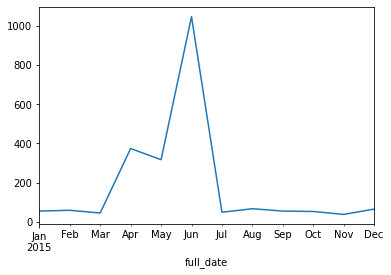

In [16]:

chart_monthly=updated_df.groupby(pd.Grouper(freq="M"))
chart_monthly.size().plot()


 Creating Daywise trend chart


<AxesSubplot:xlabel='full_date'>

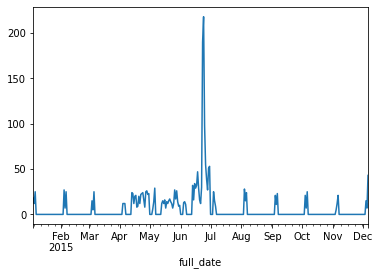

In [19]:

chart_daily=updated_df.groupby(pd.Grouper(freq="D"))
chart_daily.size().plot()


 Creating a new categorical variable (new_status) out of existing status

In [20]:
             
updated_df["new_status"] = ["Open" if i=="Open" or i=="Pending" else "Closed" for i in updated_df['status']]

updated_df
   

,ticketNo,customer_complaint,date,date_month_year,time,received_via,city,state,zip_code,status,filing_on_behalf_of_someone,full_date,new_status
full_date,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-04 09:13:18,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04 09:13:18,Closed
2015-02-06 13:24:39,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06 13:24:39,Closed
2015-09-06 17:28:41,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06 17:28:41,Closed


Distribution of statewise complaint count


In [21]:
state_sorted=updated_df.groupby(["state"]).size().sort_values(ascending=False)
state_sorted=state_sorted.reset_index()
state_sorted=state_sorted.rename({0: "count"}, axis=1)
state_sorted


,state,count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,142
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


 State with maximum complaints


In [22]:
print(state_sorted.max()['state'],'has maximum open complaints with count :',state_sorted.max()['count'])


West Virginia has maximum open complaints with count : 288


Distribution of statewise based on new status





In [23]:

complaint_status = updated_df.groupby(["state","new_status"]).size().unstack().fillna(0)
complaint_status


new_status,Closed,Open
state,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:xlabel='state'>

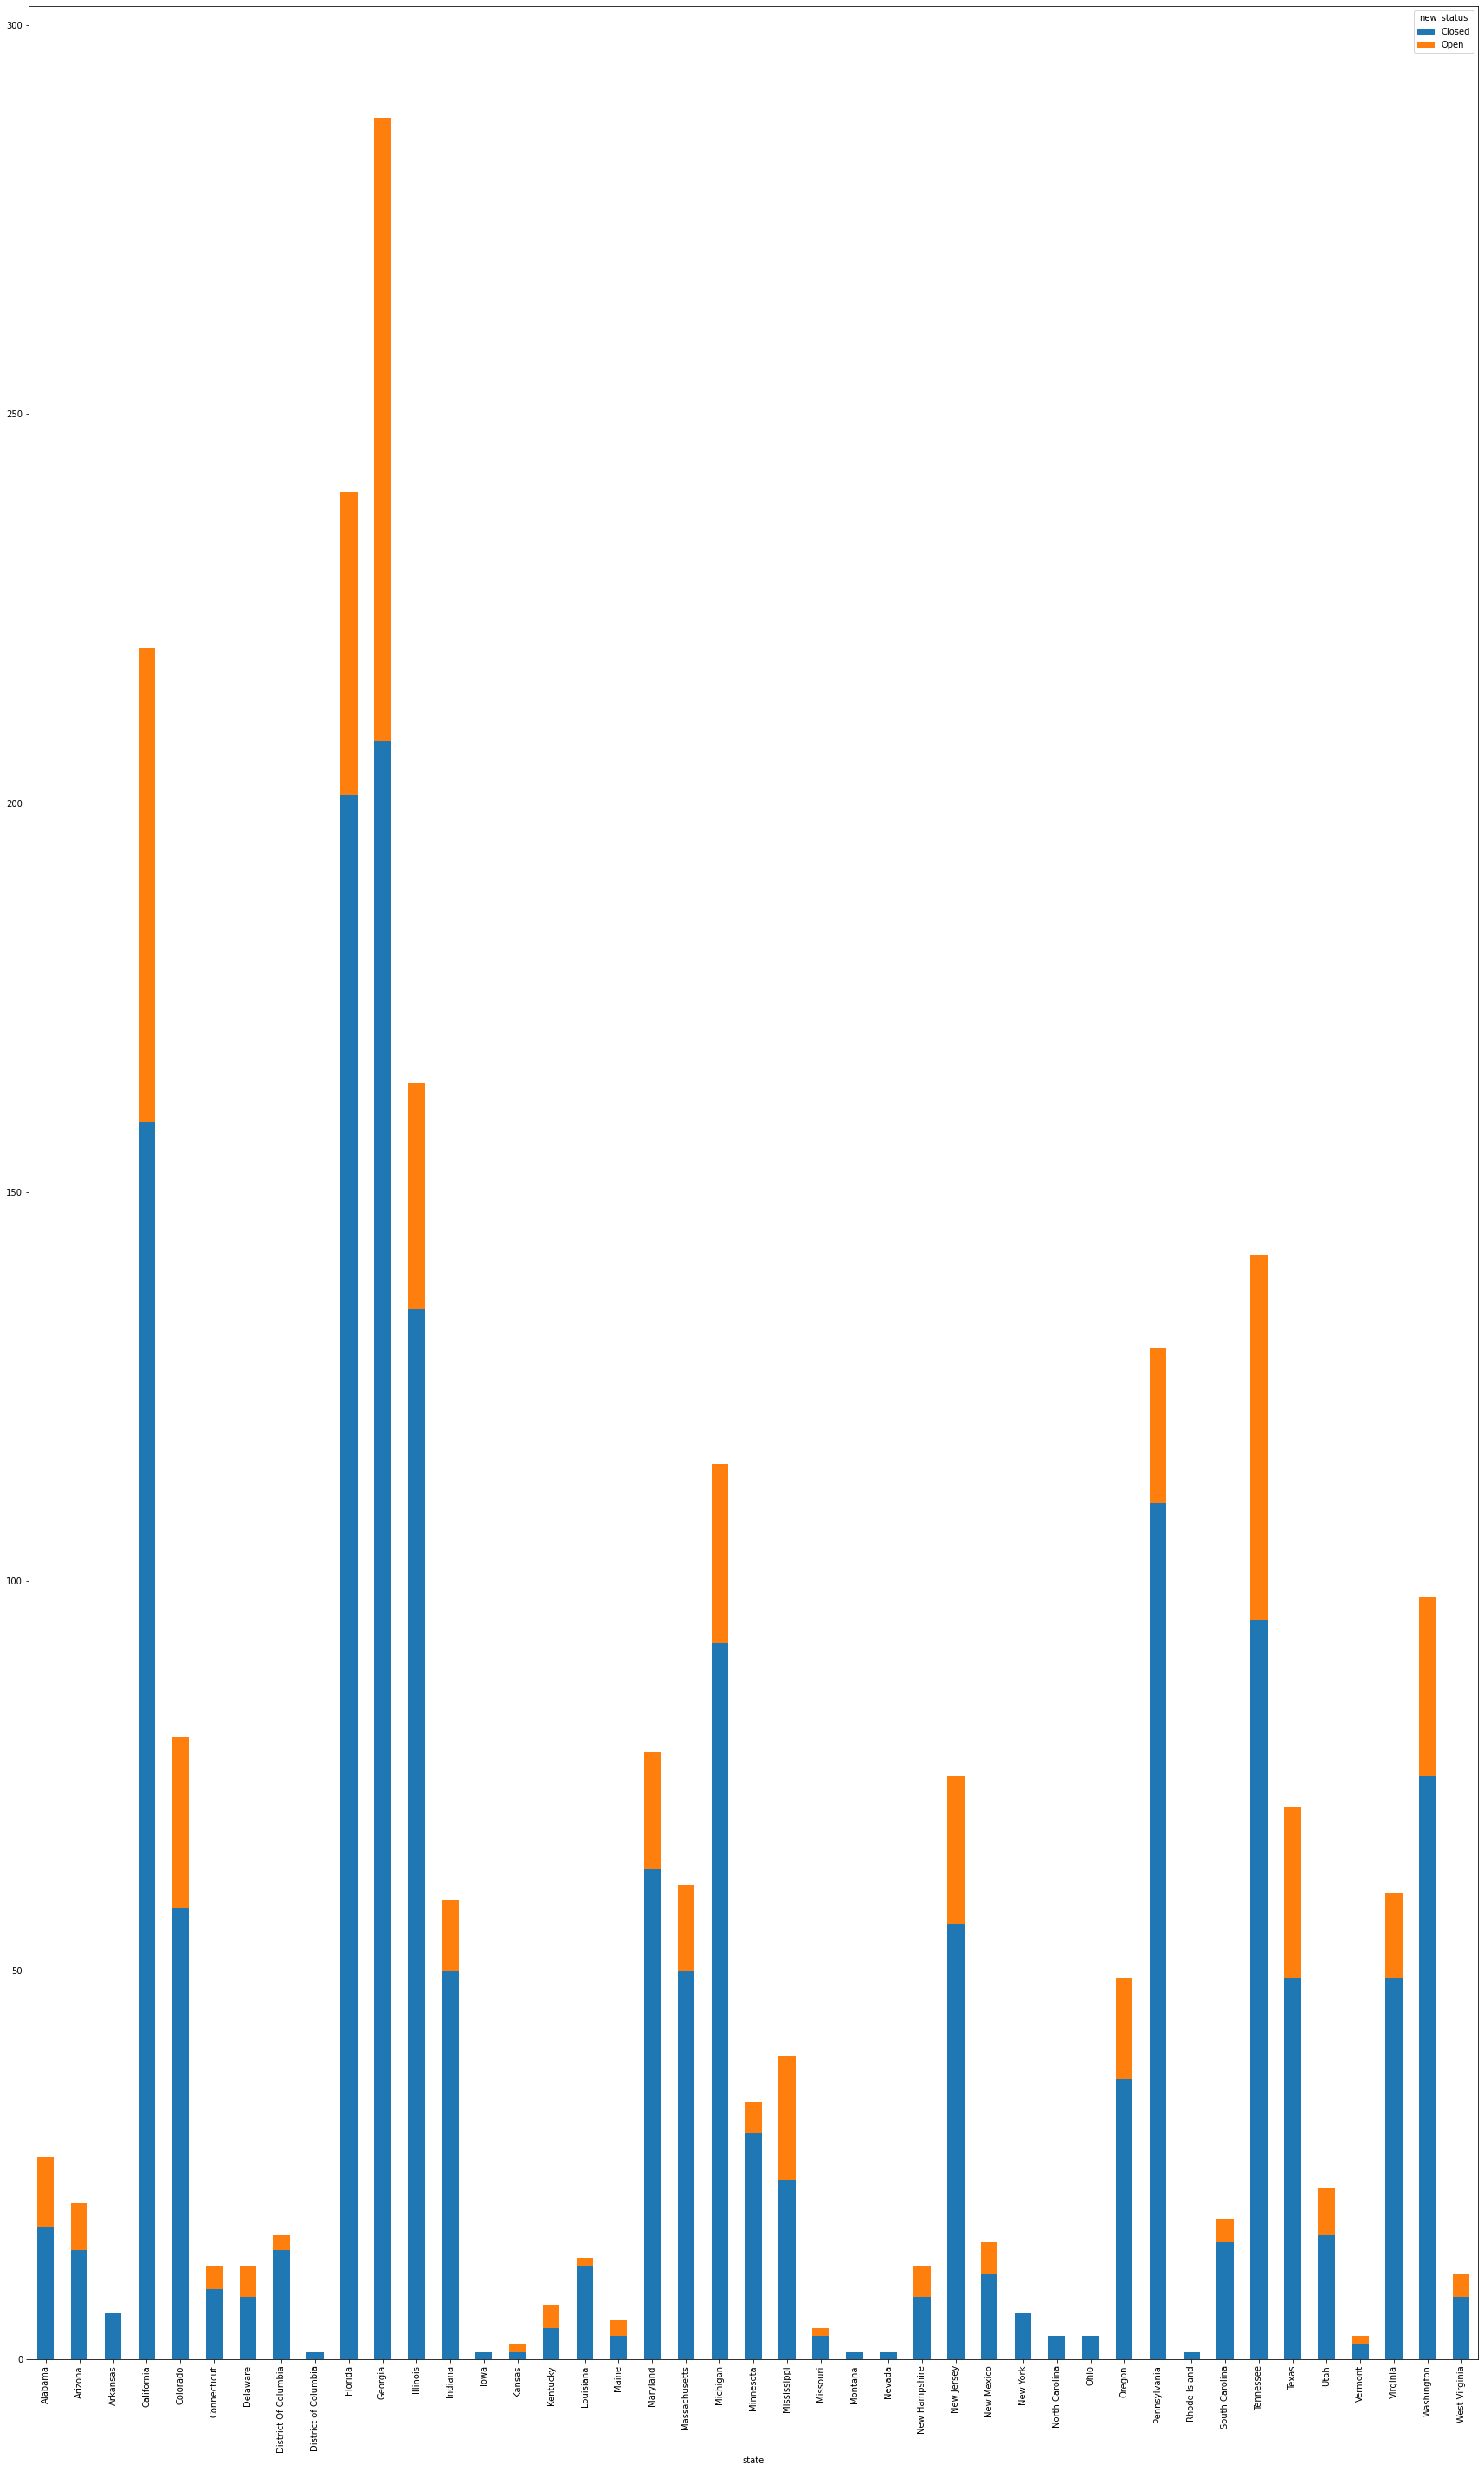

In [24]:
complaint_status.plot(kind="bar", figsize=(30,50), stacked=True)

state wise all complaint percentages

In [25]:

state_sorted['cumulative_sum'] = state_sorted['count'].cumsum()
state_sorted['percent_contribution']=100*state_sorted['count'].round(1)/state_sorted['cumulative_sum'].max()
state_sorted


,state,count,cumulative_sum,percent_contribution
0,Georgia,288,288,12.955466
1,Florida,240,528,10.796221
2,California,220,748,9.896536
3,Illinois,164,912,7.377418
4,Tennessee,142,1054,6.387764
5,Pennsylvania,130,1184,5.847953
6,Michigan,115,1299,5.173189
7,Washington,98,1397,4.408457
8,Colorado,80,1477,3.598740
9,Maryland,78,1555,3.508772


 state wise open complaint percentages

In [26]:

status_summary=updated_df.groupby(["state","new_status"]).size().unstack().fillna(0)
total_open_complaints=status_summary['Open'].sum()


Analysis comment

In [27]:

print('Total open complaints',total_open_complaints)


Total open complaints 517.0


In [28]:

complaint_status['percent_open_complaints']=(100*complaint_status['Open']/total_open_complaints).round(1)
complaint_status

new_status,Closed,Open,percent_open_complaints
state,,,
Alabama,17.0,9.0,1.7
Arizona,14.0,6.0,1.2
Arkansas,6.0,0.0,0.0
California,159.0,61.0,11.8
Colorado,58.0,22.0,4.3
Connecticut,9.0,3.0,0.6
Delaware,8.0,4.0,0.8
District Of Columbia,14.0,2.0,0.4
District of Columbia,1.0,0.0,0.0


 Top 3 states with open complaint %

In [29]:

complaint_status.sort_values(by='percent_open_complaints',ascending=False,inplace=True)
complaint_status.head(3)


new_status,Closed,Open,percent_open_complaints
state,,,
Georgia,208.0,80.0,15.5
California,159.0,61.0,11.8
Tennessee,95.0,47.0,9.1


Analysis comment

In [30]:
print('State ',complaint_status.iloc[0].name, ' has maximum open cases of ',complaint_status.iloc[0]['Open'])

State  Georgia  has maximum open cases of  80.0


Percentage of complaints resolved till date, which were received through
the Internet and customer care calls.


In [31]:

recieved_via_call_or_internet = updated_df.groupby(['received_via','new_status']).size().unstack().fillna(0)
total_closed=recieved_via_call_or_internet['Closed'].sum()
recieved_via_call_or_internet['percentage_closed']=(100*recieved_via_call_or_internet['Closed']/total_closed).round(1)
recieved_via_call_or_internet


new_status,Closed,Open,percentage_closed
received_via,,,
Customer Care Call,863,255,50.6
Internet,843,262,49.4


Analysis comment

In [33]:
print('Complaints recieved by ',recieved_via_call_or_internet.iloc[0].name, ' has maximum closed percentage of ',recieved_via_call_or_internet.iloc[0].name)

Complaints recieved by  Customer Care Call  has maximum closed percentage of  Customer Care Call


 New categorical variable: Complaint type

In [34]:

updated_df.customer_complaint=updated_df.customer_complaint.str.lower()
wordcounts=updated_df.customer_complaint.str.split(expand=True).stack().value_counts()
wordcounts


comcast             1160
internet             508
service              411
and                  277
billing              273
                    ... 
same-day               1
practices-unfair       1
services/billing       1
charge.                1
it.                    1
Length: 1806, dtype: int64